## Regresión polinomica
La regresión lineal es una herramienta extremadamente potente para realizar análisis de datos y construir modelos de Machine Learning capaces de hacer inferencias sobre datos nuevos. Sin embargo, esto es sólo cierto para datos que tienen un comportamiento lineal, lo que no siempre ocurre. Vamos a trabajar con un dataset sencillo, pero cuyos datos no son lineales: https://www.kaggle.com/akram24/position-salaries
Este dataset contiene los salarios según su nivel.

In [1]:
import pandas as pd

datos = pd.read_csv('Position_Salaries.csv')
print (datos)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


Son muy pocos datos, lo que hace a este conjunto de datos interesante para usarlo como ejemplo. Como siempre, empezamos por el principio. Vamos a visualizar qué forma tienen los datos.

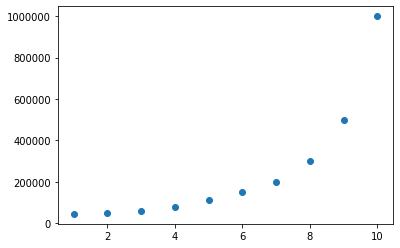

In [13]:
from matplotlib import pyplot as plt

x = datos['Level'].values.reshape(-1, 1) # necesitamos un array de 2D para SkLearn
y = datos['Salary'].values.reshape(-1, 1)
plt.scatter(x,y)

Vamos a ver qué tal se ajusta a un modelo lineal, para lo cuál aplicamos una regresión lineal valiéndonos de la librería SkLearn.

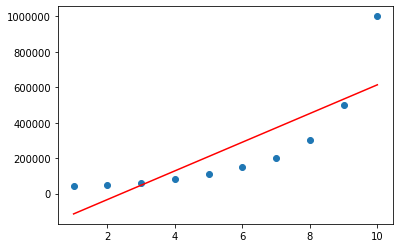

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

No parece que el modelo lineal se ajuste demasiado bien. Una forma de medir la bondad del ajuste es calcular la media de la raíz del error cuadrático (root mean square error) que nos da una medida del error cometido por el modelo ya que es la media de la desviación de los valores estimados. Otra métrica interesante es la medida R2 (R al cuadrado), cuyo valor está entre 0 y 1, los que lo hace mejor a la hora de interpretar su valor, y es la fracción de la suma total de cuadrados que se 'explica por' la regresión.

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

RMSE: 163388.73519272613
R2: 0.6690412331929895


Si nos fijamos, sobre todo en R2, vemos que el ajuste no es bueno (mientras más cercano a 1, mejor ajuste). Estaremos de acuerdo en que una curva se ajustaría mejor. Si queremos ajustar una curva a los datos tendremos que trabajar con más dimensiones. Es decir, tendremos que intentar ajustar un polinomio (de segundo grado, por ejemplo). Para ello fijémonos en la ecuación de la recta que hemos ajustado con la regresión lineal.

\begin{align}
y=a+bx
\end{align}

Siquisieramos ajustar los datos con una función de segundo grado, de decir, una curva, necesitamos añadir un término cuadrático. Recordemos que b es un atributo que sale de los datos, así que vamos a añadir a la función este mismo atributo pero al cuadrado.

\begin{align}
y=a+bx+bx^2
\end{align}

Esta transformación la podemos realizar fácilmente son SkLearn gracias a la función PolynomialFeatures(). A la que le indicamos el grado de la función que queremos obtener.

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x)
print(x)
print(x_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1.   1.]
 [  2.   4.]
 [  3.   9.]
 [  4.  16.]
 [  5.  25.]
 [  6.  36.]
 [  7.  49.]
 [  8.  64.]
 [  9.  81.]
 [ 10. 100.]]


Vemos que lo que ha hecho esta función es transformar una función lineal en otra cuadrática simplemente añadiendo el cuadrado del primer atributo. Vamos a dibujarla y a comprobar si se ajusta mejor.

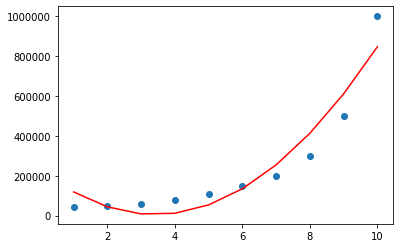

RMSE: 82212.12400451244
R2: 0.9162082221443943


In [6]:
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

Definitivamente el ajuste es mucho mejor, y el valor de R2 está mucho más cerca de 1. Si te estás preguntando qué ocurriría si en vez de una función cuadrática usaramos una función cúbica, no te cortes y pruebalo.

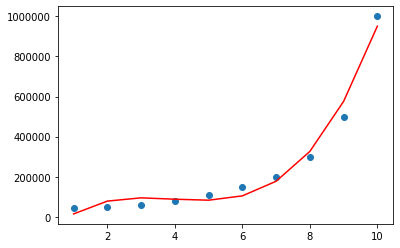

RMSE: 38931.50401232937
R2: 0.9812097727913365


In [10]:
poly = PolynomialFeatures(degree=3, include_bias=False)
x_poly = poly.fit_transform(x)

model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

Mucho mejor. ¿Y si seguimos aumentando el grado?

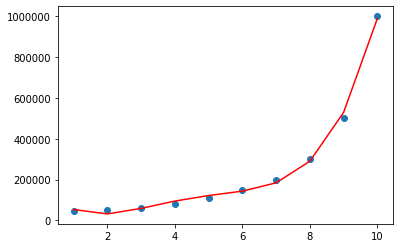

RMSE: 14503.2349096276
R2: 0.9973922891706611


In [11]:
poly = PolynomialFeatures(degree=4, include_bias=False)
x_poly = poly.fit_transform(x)

model.fit(x_poly, y)
y_pred = model.predict(x_poly)

plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.show()

rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print ('RMSE: ' + str(rmse))
print ('R2: ' + str(r2))

Guau, el ajuste es casi perfecto. Pues ya puestos vamos a usar una función de grado 100 y será mucho mejor ¿no?
En realidad no. Como no tenemos datos de validación, estamos un poco a ciegas en cuanto a comprobar si nuestro modelos está sobreaprendiendo (overfitting), aunque un ajuste tan perfecto nos tiene que hacer sospechar. Si tuvieramos que usar el modelo para hacer predicciones sobre datos nuevos, seguramente las dos medidas que hemos usado para comprobar la bondad del ajuste (RMSE y R2) empezarían a degradarse considerablemte, ya que lo que ha hecho nuestro modelo es "aprenderse" los datos de entrenamiento, lo que significa que generalizará mal con nuevos datos. En un caso como este, vale más un modelo más genérico (como el cuadrático) que uno que ajuste demasiado bien los datos de entrenamiento.